# <center> Data Cleaning

As of the data is just pure JSON files. We cannot do some analysis on it. Cause it might contains some wrong draws for some drawings. So we need to visualize it first to have a clear overview of the data. Then we can clean it and make it ready for analysis by deleting all the outliers and the wrong data.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json
import glob
import os,sys

We'll test first with one file to see the process and then we'll apply the same process to all the files.

In [3]:
with open('newdata/json/715.json','r') as f:
    d = json.load(f)
    Xcar=[] # The X-axis coordinates of the draw
    ycar=[] # The y-axis coordinates of the draw
    for line in d['drawings']['fish']:
        print(len(line)) # the number of lines to draw this figure
        print(line)
        for point in line:
            #print(point[0])
            Xcar.append(point[0])
            ycar.append(point[1])

97
[[53, 125], [53, 126], [55, 129], [57, 132], [57, 134], [59, 139], [62, 144], [62, 146], [64, 149], [64, 151], [67, 155], [68, 158], [68, 160], [71, 164], [74, 169], [75, 171], [77, 174], [79, 177], [79, 179], [82, 184], [84, 188], [85, 189], [85, 191], [85, 192], [85, 194], [85, 197], [85, 198], [85, 199], [85, 201], [85, 202], [84, 204], [83, 207], [82, 208], [81, 209], [81, 213], [80, 214], [78, 218], [77, 220], [75, 223], [74, 225], [74, 226], [73, 229], [71, 232], [70, 234], [68, 238], [66, 243], [65, 244], [63, 249], [63, 252], [62, 254], [62, 255], [62, 256], [62, 258], [62, 259], [61, 261], [60, 265], [59, 268], [58, 270], [57, 271], [57, 272], [57, 273], [56, 275], [56, 276], [56, 277], [56, 278], [56, 279], [56, 280], [57, 281], [58, 282], [59, 282], [61, 282], [63, 282], [64, 282], [65, 282], [70, 280], [72, 279], [75, 278], [75, 277], [79, 274], [82, 270], [85, 266], [89, 262], [92, 260], [93, 258], [96, 257], [99, 255], [101, 253], [105, 250], [110, 247], [111, 246], [1

Here we gonna visualize the draw using the `matplotlib` library. And we'll save the draw as an image to see it clearly.

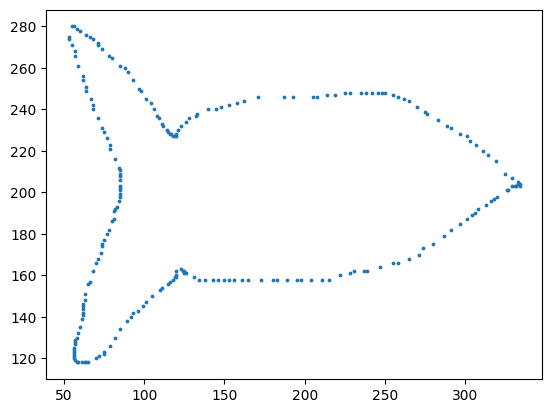

In [6]:
fig, ax = plt.subplots()

# Plot the data
ax.scatter(Xcar, [400 - y for y in ycar], s=3) # the 400 is the height of the canvas element in JavaScript and its y-axis is reverted by default 
                                               # so we have to substract the point's y-coordinates from the height of the image

#save the plot
plt.savefig('newdata/imgs/0.png')

# Show the plot
plt.show()

To clean the data we must visualize it to see if there is any false/wrong drawing to delete


And for that we're going to save the plot as images and then check it manually "*UNFORTUNATELY*"

In [4]:
for j,file in enumerate(glob.glob('newdata/json/*')):
    with open(file,'r') as f:
        d = json.load(f)
        #os.makedirs(f"newdata/imgs/{d['session']}",exist_ok=True)
        drawings=['bicycle','car','clock','fish','guitar','house','pencil','tree']
        
        for draw in drawings:
            fig, ax = plt.subplots()
            for path in d['drawings'][draw]:
                path = np.array(path)
                ax.plot(path[:, 0], 400-path[:,1], color='k',)
            fig.savefig(f"newdata/imgs/{d['session']}_{draw}.png")
        print(f"Session : {d['session']}")
            #plt.show()

Session : 0
Session : 1


C:\Users\IDEAPADGAMING\AppData\Local\Temp\ipykernel_12692\3465731436.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Session : 10
Session : 100
Session : 101
Session : 102
Session : 103
Session : 104
Session : 105
Session : 106
Session : 107
Session : 108
Session : 109
Session : 11
Session : 110
Session : 111
Session : 112
Session : 113
Session : 114
Session : 115
Session : 116
Session : 117
Session : 118
Session : 119
Session : 12
Session : 120
Session : 121
Session : 122
Session : 123
Session : 124
Session : 125
Session : 126
Session : 127
Session : 128
Session : 129
Session : 13
Session : 130
Session : 131
Session : 132
Session : 133
Session : 134
Session : 135
Session : 136
Session : 137
Session : 138
Session : 139
Session : 14
Session : 140
Session : 141
Session : 142
Session : 143
Session : 144
Session : 145
Session : 146
Session : 147
Session : 148
Session : 149
Session : 15
Session : 150
Session : 151
Session : 152
Session : 153
Session : 154
Session : 155
Session : 156
Session : 157
Session : 158
Session : 159
Session : 16
Session : 160
Session : 161
Session : 162
Session : 163
Session : 164

In [24]:
len(glob.glob('newdata/imgs/*'))

809

So after a tough identification of all the wrong draws. Now it's time for some cleaning

we gonna delete all the drawings that are wrong and will confuse our model!

In [3]:
with open('data_cleaning.txt') as file:
    jsonfiles = glob.glob('newdata/json/*')
    for jfile in jsonfiles:
        with open(jfile,'r') as jf:
            d=json.load(jf)
            for raw in file.readlines():
                try:
                    print(f"session : {raw.split('_')[0]}\ndraw : {raw.split('_')[1]}")
                except:
                    print(f"session {raw} will be deleted completely")

session : 4
draw : clock

session : 2
draw : pencil

session : 9
draw : guitar

session : 12
draw : pencil
session : 16
draw : fish

session : 42
draw : house

session : 44
draw : fish

session : 47
draw : house

session 54
 will be deleted completely
session : 57
draw : pencil

session : 65
draw : bicycle

session : 69
draw : pencil

session : 70
draw : car

session : 80
draw : house

session : 82
draw : car
session : 88
draw : car

session : 100
draw : car
session : 110
draw : car

session : 111
draw : pencil
session : 116
draw : clock

session : 122
draw : tree

session : 163
draw : pencil

session : 166
draw : bicycle

session : 165
draw : pencil

session 170
 will be deleted completely
session : 177
draw : pencil

session : 201
draw : fish

session : 255
draw : car

session : 242
draw : car
session 252
 will be deleted completely
session : 253
draw : pencil

session : 254
draw : clock

session : 267
draw : fish

session : 303
draw : car

session : 331
draw : fish
session : 334
dra

In [11]:
with open('data_cleaning.txt','r') as file:
    for raw in file.readlines():
        raw=raw.strip()
        sess=raw.split('_')[0]
        draws=raw.split('_')[1:]
        print(sess)
        print(draws)
        path=f"newdata/json/{sess}.json"
        if len(draws):
            with open(path,'r') as jfile:
                d=json.load(jfile)
                for dr in draws:
                    del d['drawings'][dr]
                print(d['drawings'].keys())
                with open(path,'w') as jfileout:
                    json.dump(d,jfileout,indent=2)   
                    print(path+' is updated!')  
        else:
            os.remove(f"newdata/json/{sess}.json")
            print(f"newdata/json/{sess}.json"+" is removed!!")
        

4
['clock']
dict_keys(['car', 'fish', 'house', 'tree', 'bicycle', 'guitar', 'pencil'])
newdata/json/4.json is updated!
2
['pencil']
dict_keys(['car', 'fish', 'house', 'tree', 'bicycle', 'guitar', 'clock'])
newdata/json/2.json is updated!
9
['guitar']
dict_keys(['car', 'fish', 'house', 'tree', 'bicycle', 'pencil', 'clock'])
newdata/json/9.json is updated!
12
['pencil', 'guitar']
dict_keys(['car', 'fish', 'house', 'tree', 'bicycle', 'clock'])
newdata/json/12.json is updated!
16
['fish']
dict_keys(['car', 'house', 'tree', 'bicycle', 'guitar', 'pencil', 'clock'])
newdata/json/16.json is updated!
42
['house']
dict_keys(['car', 'fish', 'tree', 'bicycle', 'guitar', 'pencil', 'clock'])
newdata/json/42.json is updated!
44
['fish']
dict_keys(['car', 'house', 'tree', 'bicycle', 'guitar', 'pencil', 'clock'])
newdata/json/44.json is updated!
47
['house']
dict_keys(['car', 'fish', 'tree', 'bicycle', 'guitar', 'pencil', 'clock'])
newdata/json/47.json is updated!
54
[]
newdata/json/54.json is removed!

these are just some tests hhh

In [14]:
'25'.split('_')

['25']

In [6]:
dd={'a': 1, 'b': 2, 'c': 3}

In [9]:
dd.keys()


dict_keys(['a', 'b', 'c'])

In [10]:
print()